In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/bondi_sports_daily_data.csv')

In [5]:
df.head()

,date,daily_sales,daily_traffic,promo
0,2023-01-01,91.31,986,0
1,2023-01-02,120.27,1298,0
2,2023-01-03,118.02,1274,0
3,2023-01-04,96.16,1038,0
4,2023-01-05,91.13,984,0


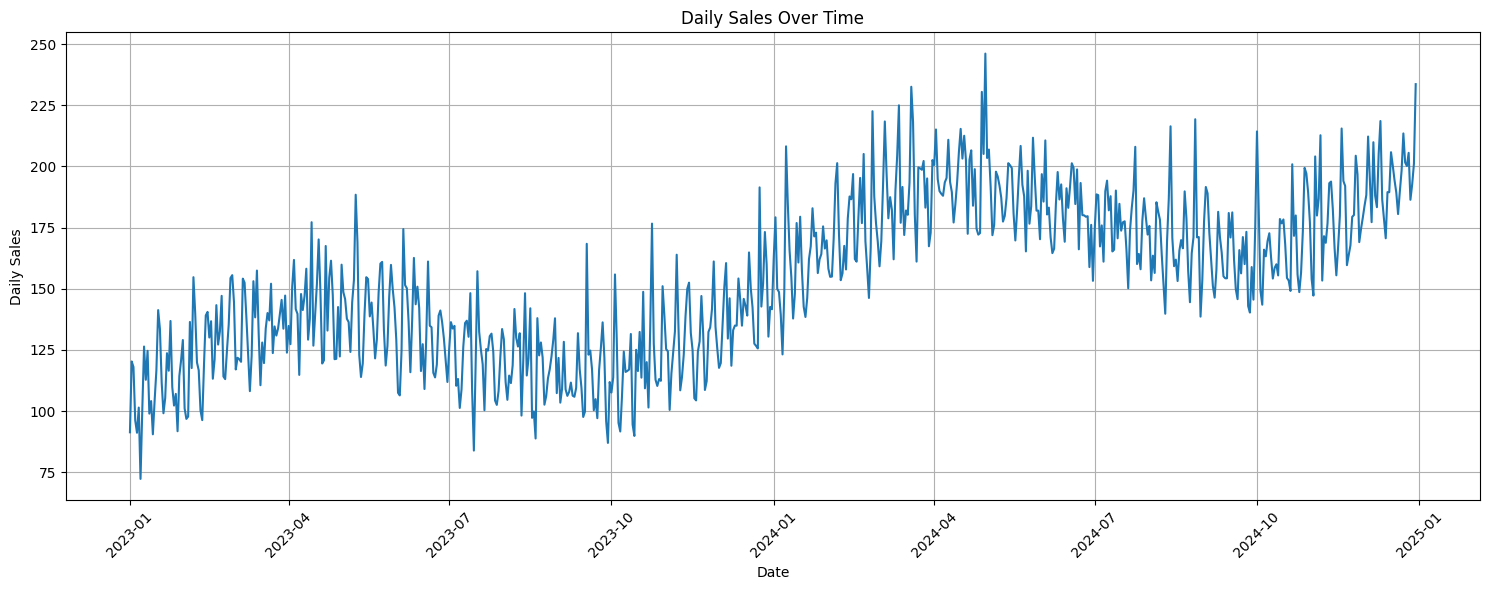

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime objects if not already done
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='daily_sales', data=df)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

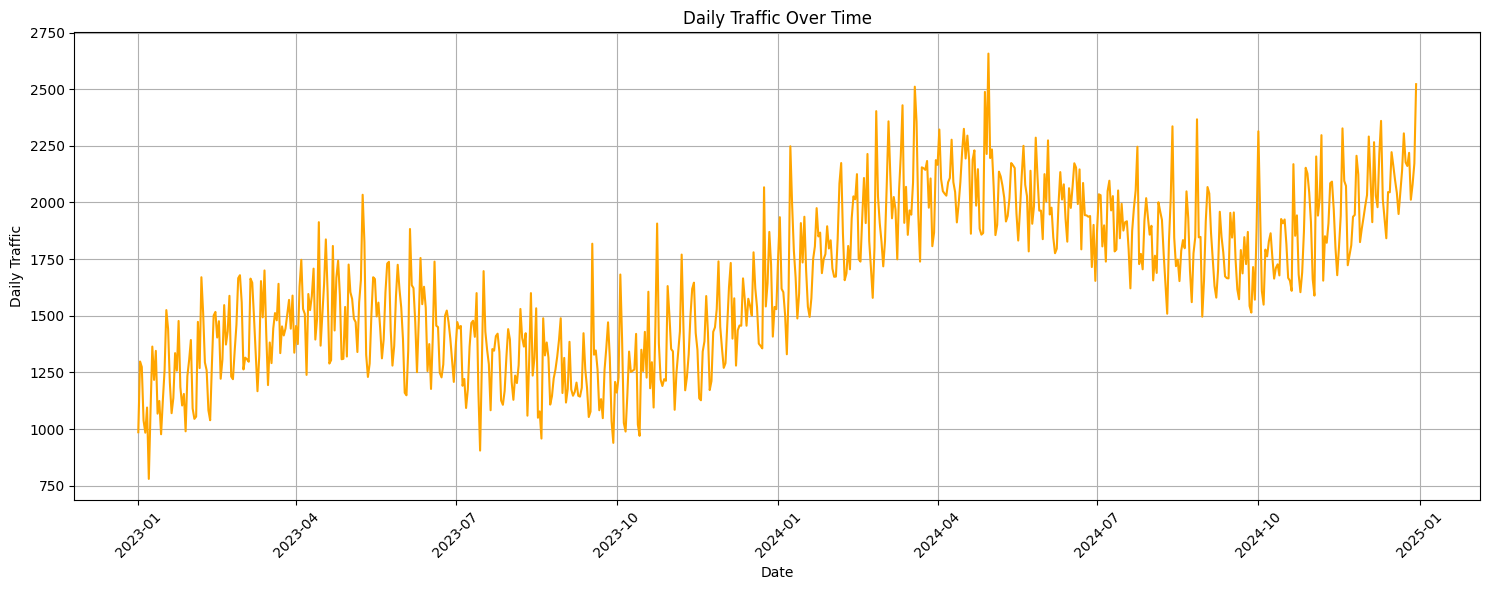

In [7]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='daily_traffic', data=df, color='orange')
plt.title('Daily Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Traffic')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can also visualize the distribution of `daily_sales` and `daily_traffic` to understand their spread.

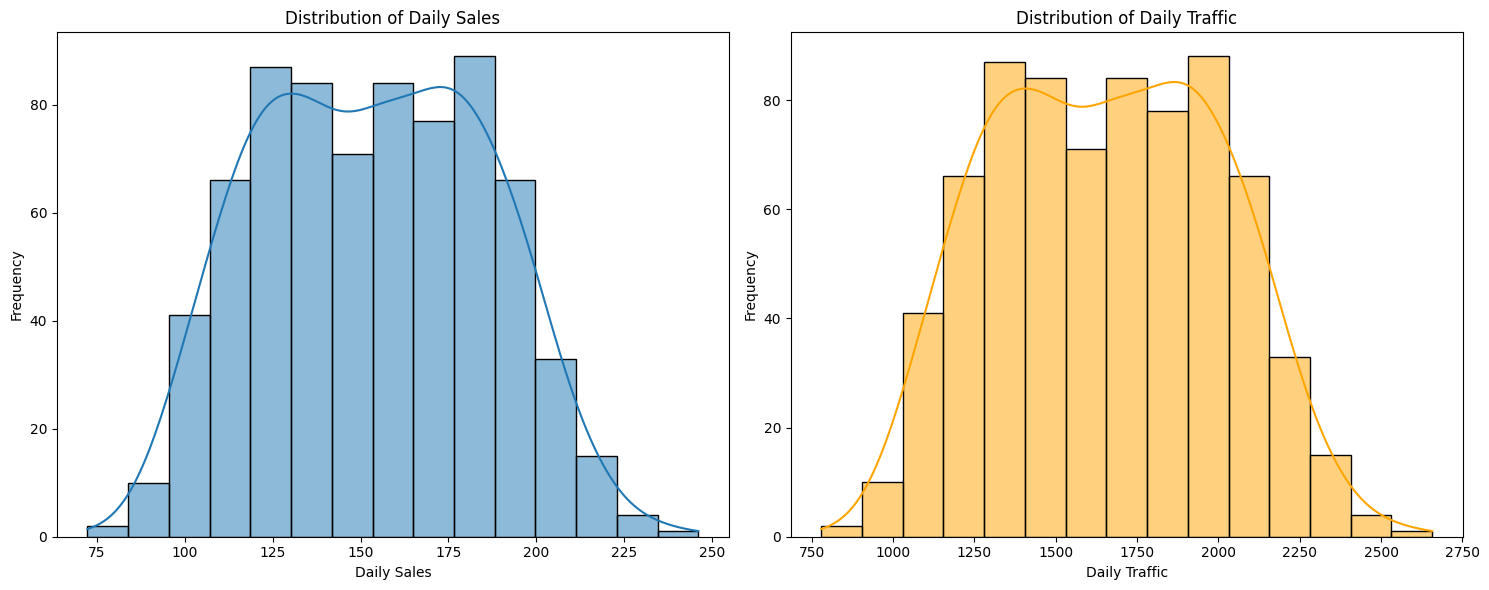

In [8]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['daily_sales'], kde=True)
plt.title('Distribution of Daily Sales')
plt.xlabel('Daily Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['daily_traffic'], kde=True, color='orange')
plt.title('Distribution of Daily Traffic')
plt.xlabel('Daily Traffic')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Identifying trends**

Let's investigate the impact of promotions on daily sales and traffic.

In [9]:
promo_impact = df.groupby('promo')[['daily_sales', 'daily_traffic']].mean().reset_index()
print('Average daily sales and traffic during promo vs. non-promo periods:')
display(promo_impact)

Average daily sales and traffic during promo vs. non-promo periods:


,promo,daily_sales,daily_traffic
0,0,149.343129,1612.122581
1,1,176.070364,1900.709091


/tmp/ipython-input-579108284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='promo', y='daily_sales', data=promo_impact, palette='viridis')
/tmp/ipython-input-579108284.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='promo', y='daily_traffic', data=promo_impact, palette='magma')


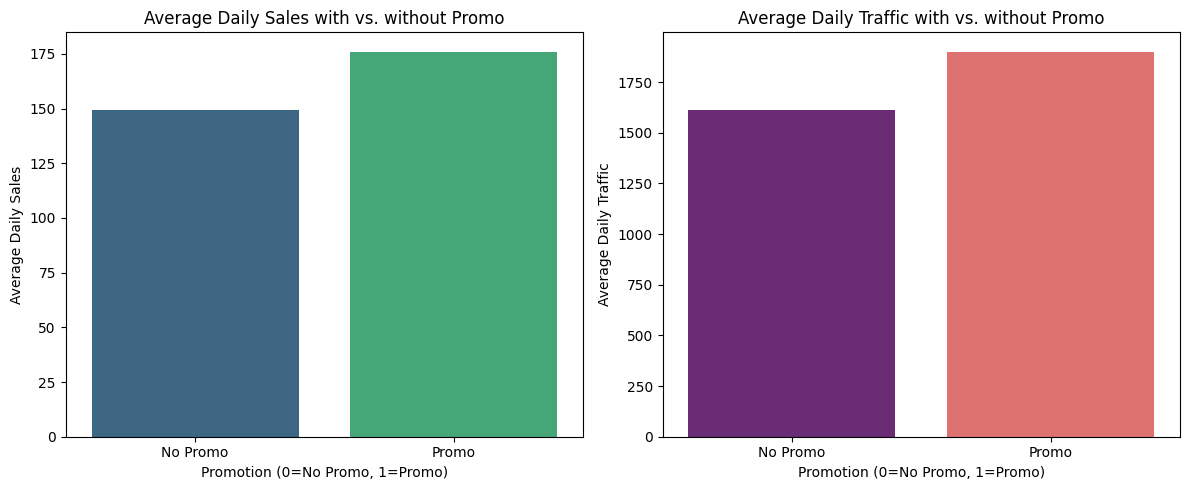

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='promo', y='daily_sales', data=promo_impact, palette='viridis')
plt.title('Average Daily Sales with vs. without Promo')
plt.xlabel('Promotion (0=No Promo, 1=Promo)')
plt.ylabel('Average Daily Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])

plt.subplot(1, 2, 2)
sns.barplot(x='promo', y='daily_traffic', data=promo_impact, palette='magma')
plt.title('Average Daily Traffic with vs. without Promo')
plt.xlabel('Promotion (0=No Promo, 1=Promo)')
plt.ylabel('Average Daily Traffic')
plt.xticks([0, 1], ['No Promo', 'Promo'])

plt.tight_layout()
plt.show()

We can also look for seasonal trends, for example, by extracting month or day of the week from the date.

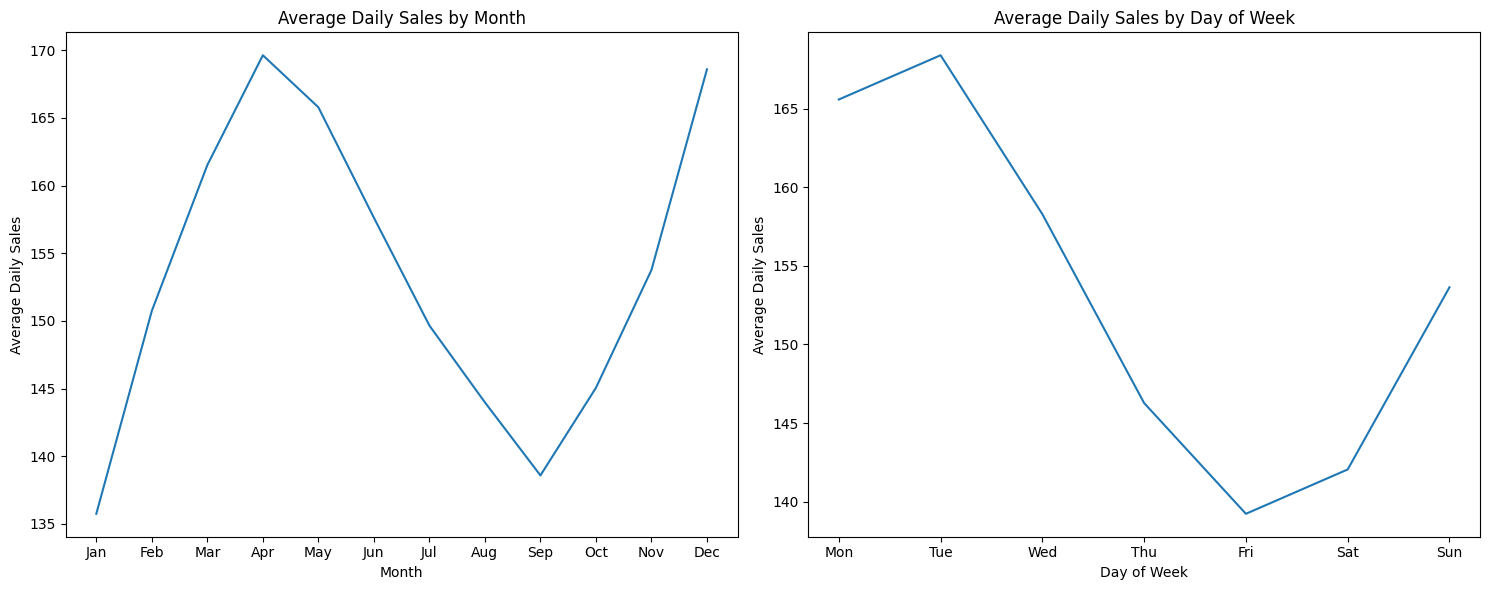

In [11]:
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek # Monday=0, Sunday=6

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='month', y='daily_sales', data=df.groupby('month')['daily_sales'].mean().reset_index())
plt.title('Average Daily Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.subplot(1, 2, 2)
sns.lineplot(x='day_of_week', y='daily_sales', data=df.groupby('day_of_week')['daily_sales'].mean().reset_index())
plt.title('Average Daily Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Daily Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

# Task
Perform time series decomposition on the `daily_sales` and `daily_traffic` columns of the `df` DataFrame to identify and visualize their trend, seasonal, and residual components. Then, analyze and discuss the insights gained from this decomposition regarding the drivers of sales and website traffic for Bondi Sports Inc.

## Prepare Time Series Data

### Subtask:
Ensure the 'date' column is set as the DataFrame index and sort the data for time series analysis. This is crucial for accurate decomposition.


**Reasoning**:
Set the 'date' column as the DataFrame index and then sort the DataFrame by this new index to prepare it for time series analysis, as instructed.



In [12]:
df = df.set_index('date')
df = df.sort_index()
df.head()

,daily_sales,daily_traffic,promo,month,day_of_week
date,,,,,
2023-01-01,91.31,986,0,1,6
2023-01-02,120.27,1298,0,1,0
2023-01-03,118.02,1274,0,1,1
2023-01-04,96.16,1038,0,1,2
2023-01-05,91.13,984,0,1,3


## Decompose Daily Sales

### Subtask:
Apply time series decomposition (using `seasonal_decompose`) to the 'daily_sales' column to extract its trend, seasonal, and residual components. I will assume an additive model for decomposition, if a multiplicative model is more appropriate, I will adjust.


**Reasoning**:
To decompose the 'daily_sales' time series, I need to import the `seasonal_decompose` function and then apply it with the specified parameters to the 'daily_sales' column.



In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_decomposition = seasonal_decompose(df['daily_sales'], model='additive', period=7)

**Reasoning**:
To visualize the decomposed components of 'daily_sales', I will plot the observed, trend, seasonal, and residual components from the `sales_decomposition` object.



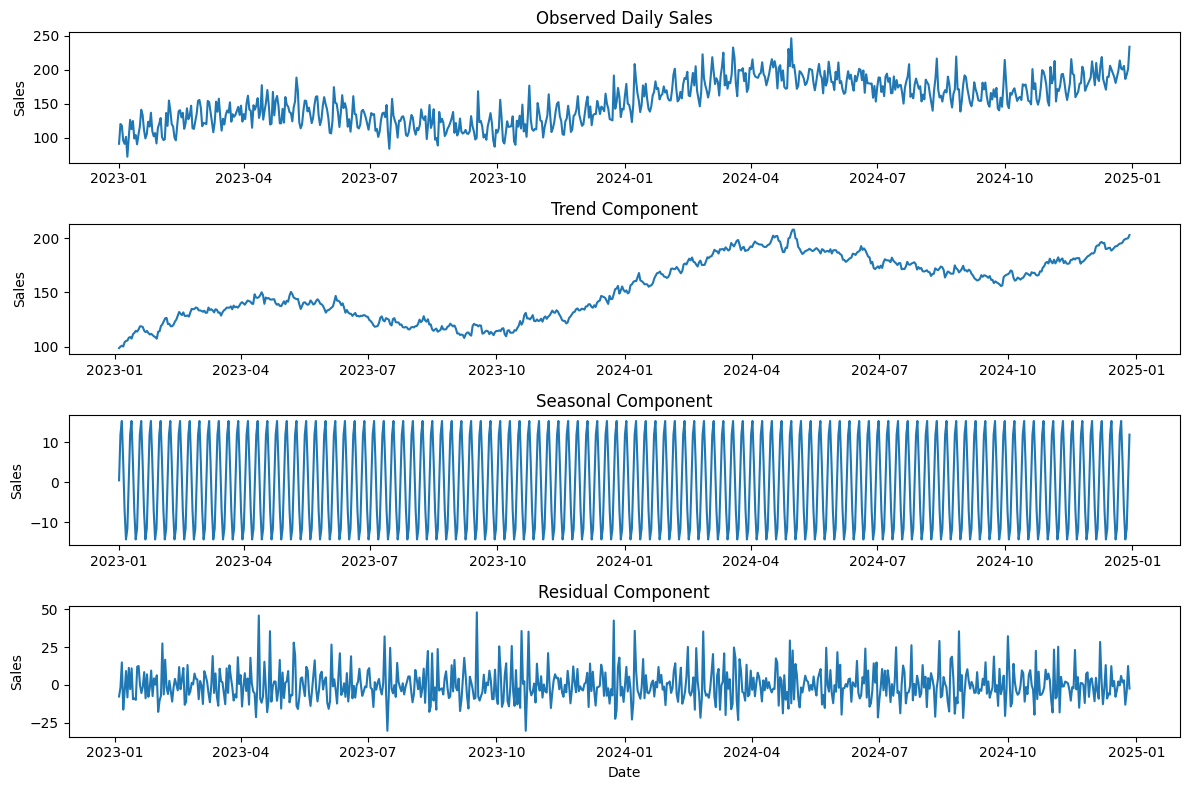

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(sales_decomposition.observed)
plt.title('Observed Daily Sales')
plt.ylabel('Sales')

plt.subplot(4, 1, 2)
plt.plot(sales_decomposition.trend)
plt.title('Trend Component')
plt.ylabel('Sales')

plt.subplot(4, 1, 3)
plt.plot(sales_decomposition.seasonal)
plt.title('Seasonal Component')
plt.ylabel('Sales')

plt.subplot(4, 1, 4)
plt.plot(sales_decomposition.resid)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

## Decompose Daily Traffic

### Subtask:
Apply time series decomposition (using `seasonal_decompose`) to the 'daily_traffic' column to extract its trend, seasonal, and residual components, using an additive model and a period of 7.

**Reasoning**:
To decompose the 'daily_traffic' time series, I need to import the `seasonal_decompose` function (which is already imported) and then apply it with the specified parameters to the 'daily_traffic' column. I will assume an additive model and a period of 7, similar to the 'daily_sales' decomposition.



In [15]:
traffic_decomposition = seasonal_decompose(df['daily_traffic'], model='additive', period=7)

**Reasoning**:
To visualize the decomposed components of 'daily_traffic', I will plot the observed, trend, seasonal, and residual components from the `traffic_decomposition` object.



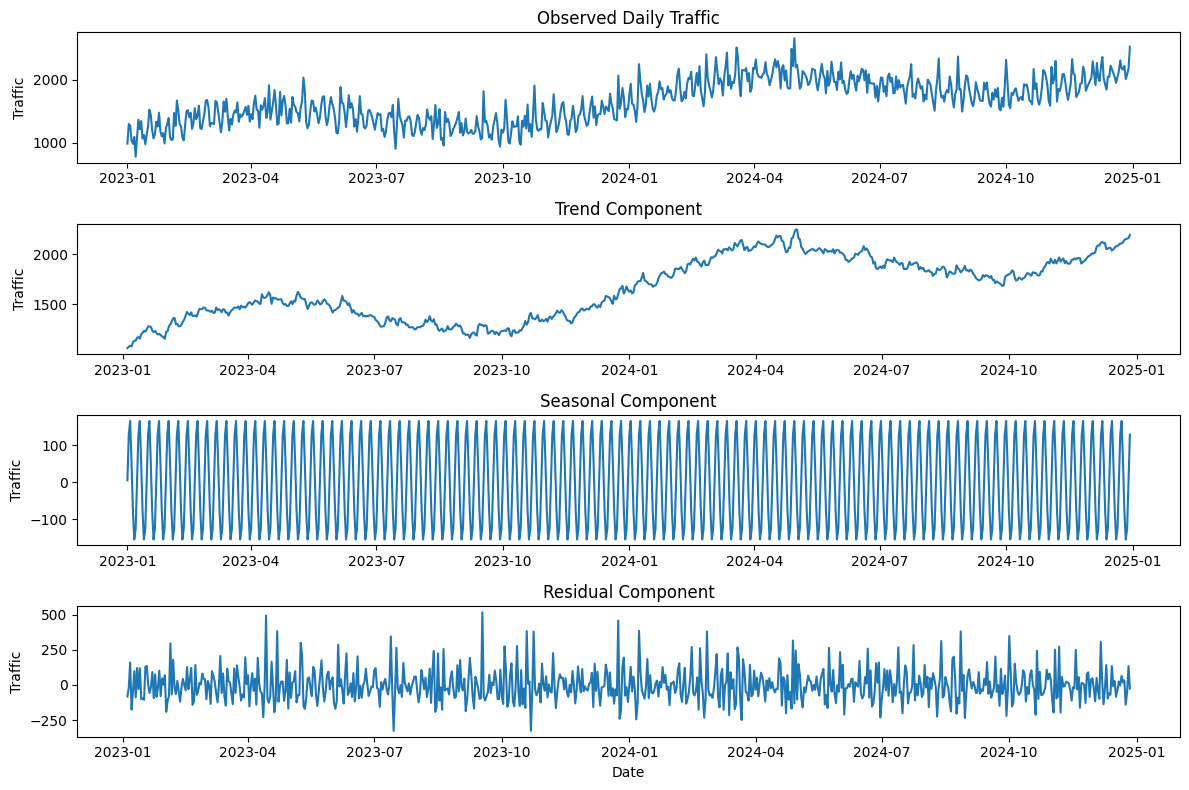

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(traffic_decomposition.observed)
plt.title('Observed Daily Traffic')
plt.ylabel('Traffic')

plt.subplot(4, 1, 2)
plt.plot(traffic_decomposition.trend)
plt.title('Trend Component')
plt.ylabel('Traffic')

plt.subplot(4, 1, 3)
plt.plot(traffic_decomposition.seasonal)
plt.title('Seasonal Component')
plt.ylabel('Traffic')

plt.subplot(4, 1, 4)
plt.plot(traffic_decomposition.resid)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Traffic')

plt.tight_layout()
plt.show()

## Analysis and Insights from Time Series Decomposition

### Daily Sales Decomposition Analysis:
- **Trend Component:** The trend component for daily sales indicates a general upward or downward movement over the entire period. If the trend is positive, it suggests growth in sales; a negative trend implies a decline. Observing the trend plot can help identify long-term business performance.
- **Seasonal Component:** The seasonal component reveals recurring patterns in daily sales, likely linked to the day of the week (since `period=7`). For example, we might see higher sales on weekends and lower sales on weekdays. This component is crucial for understanding typical weekly sales cycles.
- **Residual Component:** The residual component represents the irregular fluctuations in daily sales that are not explained by the trend or seasonal patterns. Large residuals might indicate unusual events (e.g., special promotions, unforeseen market changes, or data errors) that impact sales. Analyzing these can help in identifying one-off influential factors.

### Daily Traffic Decomposition Analysis:
- **Trend Component:** Similar to sales, the trend in daily traffic shows the long-term direction of website visitors. A growing trend suggests increased online visibility and engagement, while a declining trend could signal issues with marketing or website appeal.
- **Seasonal Component:** The seasonal component for daily traffic also highlights weekly patterns. It could show, for instance, peak traffic during specific days or hours, which is vital for planning website maintenance, content releases, or advertising campaigns.
- **Residual Component:** The residuals for daily traffic reflect unexpected spikes or drops in visitors. These could be due to viral content, news events, technical issues, or highly effective short-term marketing initiatives. Understanding these allows for better attribution of traffic anomalies.

### Overall Insights and Drivers:
By comparing the trend and seasonal components of both daily sales and daily traffic, we can infer potential relationships and drivers:
- **Correlation between Sales and Traffic:** Often, an upward trend in traffic correlates with an upward trend in sales, indicating that website visits are a key driver for purchases. Similarly, seasonal peaks in traffic might correspond with seasonal peaks in sales, suggesting that the same factors (e.g., weekend shopping habits) influence both.
- **Promotional Impact:** While promotions were analyzed separately, their effects might also be visible in the residual components of both sales and traffic if they cause significant short-term deviations from the usual trend and seasonality.
- **Business Strategy:** Understanding these components can help Bondi Sports Inc. strategize more effectively. For instance, if sales have a strong seasonal peak, marketing efforts can be intensified during those periods. If residuals are frequently high, it might warrant investigation into external factors or uncaptured internal events. If the trend for traffic is positive but sales trend is flat, it could indicate issues with conversion rates on the website.

## Final Task

### Subtask:
Summarize the key insights gained from the time series decomposition and discuss their implications for understanding the drivers of sales and website traffic at Bondi Sports Inc.


## Summary:

### Q&A
The time series decomposition of daily sales and website traffic provides crucial implications for understanding their drivers at Bondi Sports Inc.:

*   **Drivers of Daily Sales:** The trend component reveals long-term business performance, indicating overall growth or decline. The seasonal component, with a weekly period, highlights recurring patterns (e.g., potential higher sales on weekends) which are key for understanding typical sales cycles. Residuals pinpoint irregular events like special promotions or market changes that cause deviations from usual patterns.
*   **Drivers of Daily Traffic:** The trend shows the long-term direction of website visitors, indicating changes in online visibility or engagement. Weekly seasonality helps identify peak traffic days or hours, which are critical for planning. Residuals explain unexpected spikes or drops in visitors, potentially due to viral content, news, or marketing campaigns.
*   **Interrelationships and Overall Drivers:** A strong correlation is expected between upward trends and seasonal peaks in both traffic and sales, suggesting that website visits are a significant driver for purchases. The impact of promotions or other events might be visible in the residual components of both metrics.

### Data Analysis Key Findings
*   **Time Series Decomposition Performed**: Time series decomposition was successfully applied to both `daily_sales` and `daily_traffic` columns using an additive model with a period of 7, extracting observed, trend, seasonal, and residual components for each.
*   **Sales Trend & Seasonality**: The decomposition of daily sales indicated an underlying trend reflecting long-term business performance, alongside a clear weekly seasonal pattern, likely influenced by the day of the week (e.g., potential weekend sales peaks). Residuals captured unexplained fluctuations, potentially from unique events.
*   **Traffic Trend & Seasonality**: Similarly, daily website traffic decomposition revealed its long-term trend, reflecting changes in online visibility, and a distinct weekly seasonal pattern (e.g., specific days with peak traffic). Residuals accounted for unexpected traffic anomalies.
*   **Inferred Correlation**: The analysis suggests an expected correlation between sales and traffic; specifically, an upward trend in traffic often corresponds with an upward trend in sales, and seasonal peaks in traffic can align with seasonal peaks in sales, indicating website activity as a key driver for purchases.

### Insights or Next Steps
*   Bondi Sports Inc. should strategically align marketing and operational efforts with the identified weekly seasonal peaks in both sales and website traffic to maximize impact.
*   Frequent or significant high residual components in either sales or traffic should trigger investigations into specific external events (e.g., news, competitor actions) or internal initiatives (e.g., promotions, website issues) to understand their precise impact and refine future strategies.


**Apply Moving Average (MA)**

## Apply Moving Average

To smooth out short-term fluctuations and highlight longer-term trends, we can apply a moving average. A common choice for daily data is a 7-day moving average to observe weekly trends.

In [17]:
# Calculate 7-day moving average for daily_sales
df['daily_sales_ma'] = df['daily_sales'].rolling(window=7).mean()

# Calculate 7-day moving average for daily_traffic
df['daily_traffic_ma'] = df['daily_traffic'].rolling(window=7).mean()

print("DataFrame with 7-day moving averages:")
display(df[['daily_sales', 'daily_sales_ma', 'daily_traffic', 'daily_traffic_ma']].head(10))

DataFrame with 7-day moving averages:


,daily_sales,daily_sales_ma,daily_traffic,daily_traffic_ma
date,,,,
2023-01-01,91.31,NaN,986,NaN
2023-01-02,120.27,NaN,1298,NaN
2023-01-03,118.02,NaN,1274,NaN
2023-01-04,96.16,NaN,1038,NaN
2023-01-05,91.13,NaN,984,NaN
2023-01-06,101.42,NaN,1095,NaN
2023-01-07,72.26,98.652857,780,1065.000000
2023-01-08,100.53,99.970000,1085,1079.142857
2023-01-09,126.38,100.842857,1364,1088.571429


Now, let's visualize the original data alongside their moving averages to see the smoothing effect.

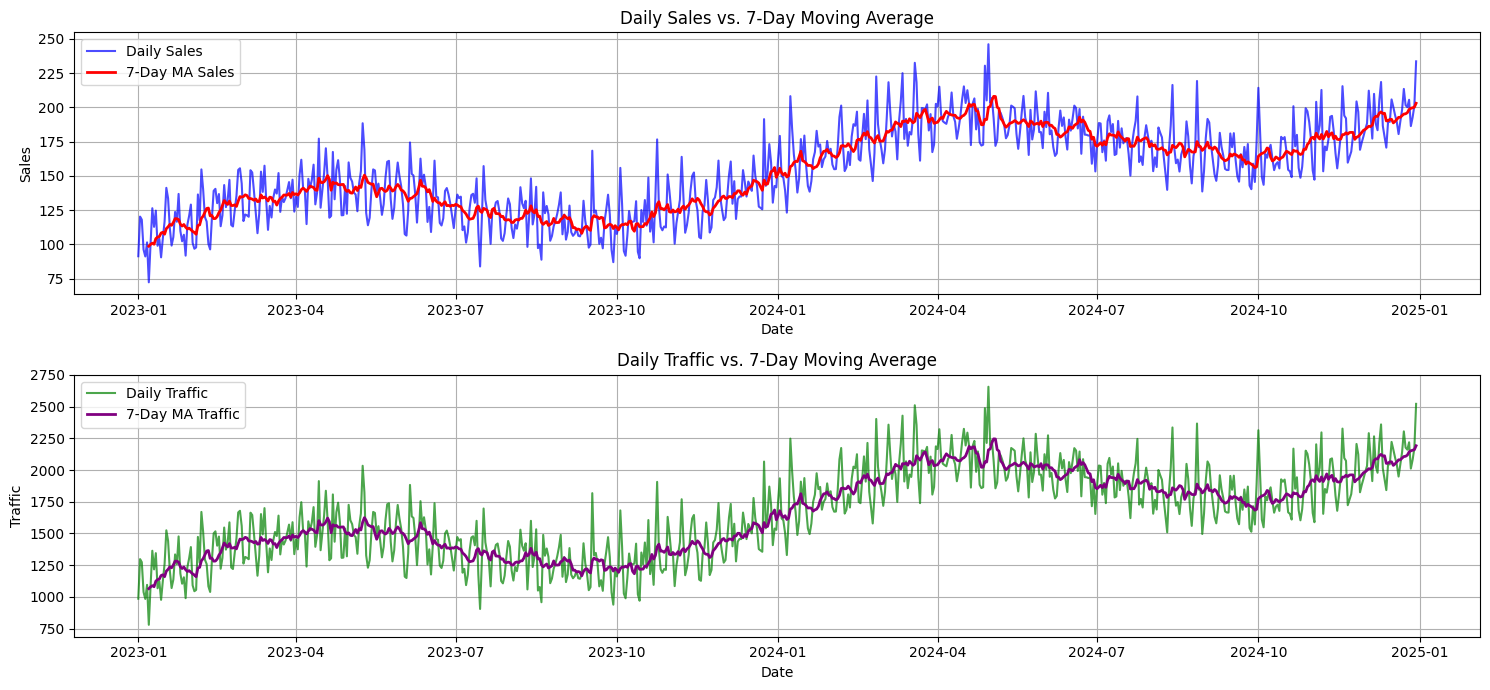

In [19]:
plt.figure(figsize=(15, 7))

# Plot daily sales and its moving average
plt.subplot(2, 1, 1)
sns.lineplot(x=df.index, y='daily_sales', data=df, label='Daily Sales', color='blue', alpha=0.7)
sns.lineplot(x=df.index, y='daily_sales_ma', data=df, label='7-Day MA Sales', color='red', linewidth=2)
plt.title('Daily Sales vs. 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Plot daily traffic and its moving average
plt.subplot(2, 1, 2)
sns.lineplot(x=df.index, y='daily_traffic', data=df, label='Daily Traffic', color='green', alpha=0.7)
sns.lineplot(x=df.index, y='daily_traffic_ma', data=df, label='7-Day MA Traffic', color='purple', linewidth=2)
plt.title('Daily Traffic vs. 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Apply Exponential Smoothing (ES)**

## Apply Exponential Smoothing (ES)

Exponential Smoothing is a time series forecasting method for univariate data. It assigns exponentially decreasing weights to older observations. We'll apply Holt-Winters Exponential Smoothing, which can handle trend and seasonality.

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Exponential Smoothing to daily_sales
# Using additive trend and additive seasonality with a period of 7 (weekly)
sales_es_model = ExponentialSmoothing(df['daily_sales'], seasonal_periods=7, trend='add', seasonal='add', initialization_method="estimated").fit()
df['daily_sales_es'] = sales_es_model.fittedvalues

# Apply Exponential Smoothing to daily_traffic
traffic_es_model = ExponentialSmoothing(df['daily_traffic'], seasonal_periods=7, trend='add', seasonal='add', initialization_method="estimated").fit()
df['daily_traffic_es'] = traffic_es_model.fittedvalues

print("DataFrame with Exponential Smoothing results:")
display(df[['daily_sales', 'daily_sales_es', 'daily_traffic', 'daily_traffic_es']].head(10))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


DataFrame with Exponential Smoothing results:


,daily_sales,daily_sales_es,daily_traffic,daily_traffic_es
date,,,,
2023-01-01,91.31,101.398358,986,1083.344133
2023-01-02,120.27,113.174594,1298,1211.230409
2023-01-03,118.02,117.372873,1274,1257.288083
2023-01-04,96.16,107.776559,1038,1154.500279
2023-01-05,91.13,95.472338,984,1022.415161
2023-01-06,101.42,88.572365,1095,948.524979
2023-01-07,72.26,92.649607,780,993.380786
2023-01-08,100.53,103.880843,1085,1115.234518
2023-01-09,126.38,115.999082,1364,1246.691105


Now, let's visualize the original data alongside their Exponential Smoothing results to observe the smoothing and trend capture.

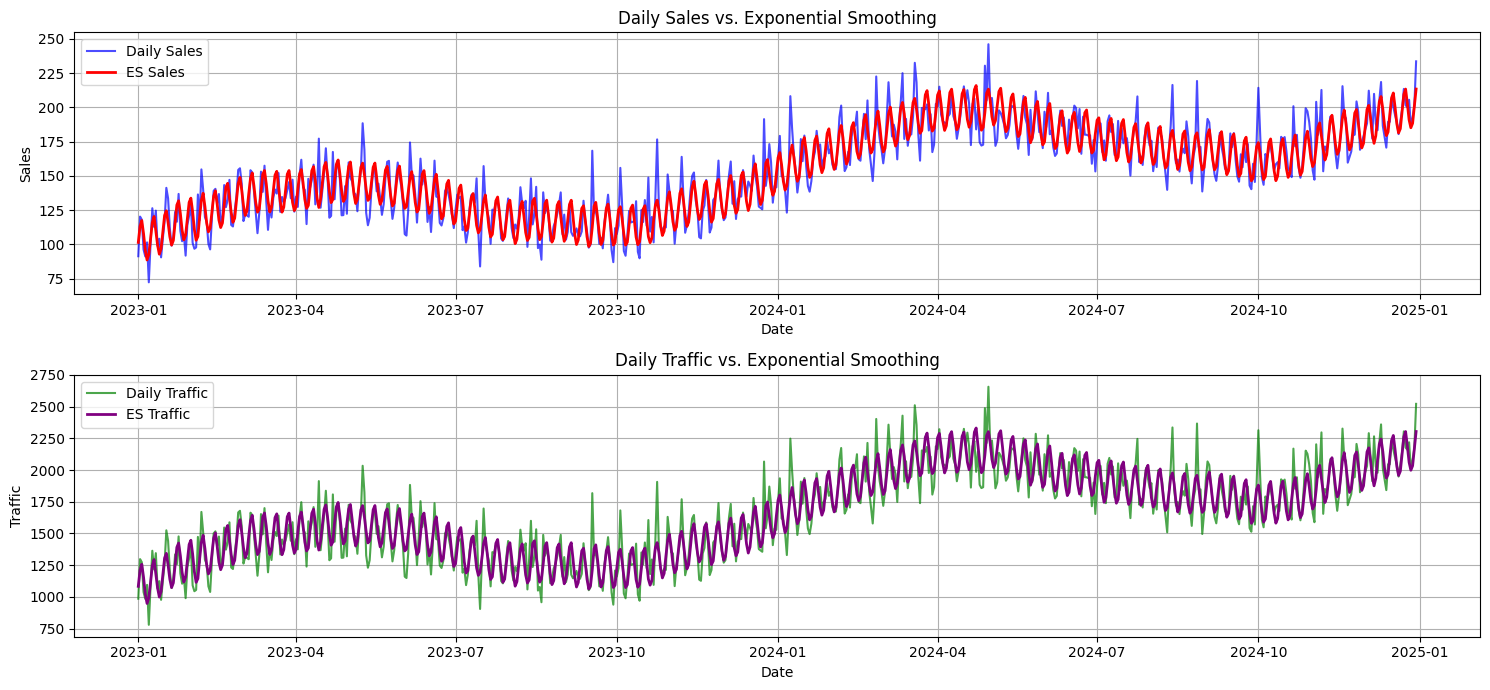

In [22]:
plt.figure(figsize=(15, 7))

# Plot daily sales and its Exponential Smoothing result
plt.subplot(2, 1, 1)
sns.lineplot(x=df.index, y='daily_sales', data=df, label='Daily Sales', color='blue', alpha=0.7)
sns.lineplot(x=df.index, y='daily_sales_es', data=df, label='ES Sales', color='red', linewidth=2)
plt.title('Daily Sales vs. Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Plot daily traffic and its Exponential Smoothing result
plt.subplot(2, 1, 2)
sns.lineplot(x=df.index, y='daily_traffic', data=df, label='Daily Traffic', color='green', alpha=0.7)
sns.lineplot(x=df.index, y='daily_traffic_es', data=df, label='ES Traffic', color='purple', linewidth=2)
plt.title('Daily Traffic vs. Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Model Evaluation**

## Model Validation: Moving Average (MA) and Exponential Smoothing (ES)

To validate our models, we will:
1.  Split the data into training and testing sets.
2.  Fit each model on the training data.
3.  Generate forecasts for the test set.
4.  Evaluate the forecasts using metrics like MAE, MSE, RMSE, and MAPE.

We will demonstrate this process for `daily_sales`.

### 1. Data Splitting

In [23]:
train_size = int(len(df) * 0.8) # 80% for training
train_sales, test_sales = df['daily_sales'][0:train_size], df['daily_sales'][train_size:]

print(f"Training set size: {len(train_sales)}")
print(f"Test set size: {len(test_sales)}")

display(train_sales.tail())
display(test_sales.head())

Training set size: 584
Test set size: 146


,daily_sales
date,
2024-08-02,153.43
2024-08-03,163.54
2024-08-04,156.47
2024-08-05,185.37
2024-08-06,181.53


,daily_sales
date,
2024-08-07,178.16
2024-08-08,164.09
2024-08-09,151.66
2024-08-10,139.79
2024-08-11,169.32


### 2. Moving Average Model Validation

In [24]:
# Calculate 7-day moving average on the training data
train_sales_ma = train_sales.rolling(window=7).mean()

# For forecasting, a simple approach for MA is to use the last known moving average value
# or re-calculate it based on the test set and training set combined (rolling window)
# For simplicity and direct comparison with ES, let's just use the 'fitted' values concept
# For true forecasting, you'd extend the window or use a more sophisticated method.
# Here, we'll compare the MA applied to the full data (as previously computed) with test data

# Recalculate MA on the full data to get MA for the test period
full_sales_ma = df['daily_sales'].rolling(window=7).mean()
ma_predictions = full_sales_ma[train_size:]

# Ensure predictions and test_sales align perfectly
ma_predictions = ma_predictions.reindex(test_sales.index)

print("Moving Average predictions for test set:")
display(ma_predictions.head())

Moving Average predictions for test set:


,daily_sales
date,
2024-08-07,170.598571
2024-08-08,168.941429
2024-08-09,168.688571
2024-08-10,165.295714
2024-08-11,167.131429


### 3. Exponential Smoothing Model Validation

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit Exponential Smoothing on training data
es_model_train = ExponentialSmoothing(train_sales, seasonal_periods=7, trend='add', seasonal='add', initialization_method="estimated").fit()

# Forecast for the test period
es_predictions = es_model_train.forecast(len(test_sales))

print("Exponential Smoothing predictions for test set:")
display(es_predictions.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Exponential Smoothing predictions for test set:


,0
2024-08-07,174.668739
2024-08-08,163.414853
2024-08-09,155.596533
2024-08-10,157.923759
2024-08-11,170.140514


### 4. Evaluation Metrics

In [26]:
# Drop NaN values from MA predictions for fair comparison
ma_predictions_cleaned = ma_predictions.dropna()
test_sales_ma_aligned = test_sales.loc[ma_predictions_cleaned.index]

# Calculate metrics for Moving Average
mae_ma = mean_absolute_error(test_sales_ma_aligned, ma_predictions_cleaned)
mse_ma = mean_squared_error(test_sales_ma_aligned, ma_predictions_cleaned)
rmse_ma = np.sqrt(mse_ma)
mape_ma = np.mean(np.abs((test_sales_ma_aligned - ma_predictions_cleaned) / test_sales_ma_aligned)) * 100

print("--- Moving Average Model Metrics ---")
print(f"MAE: {mae_ma:.2f}")
print(f"MSE: {mse_ma:.2f}")
print(f"RMSE: {rmse_ma:.2f}")
print(f"MAPE: {mape_ma:.2f}%")

# Calculate metrics for Exponential Smoothing
mae_es = mean_absolute_error(test_sales, es_predictions)
mse_es = mean_squared_error(test_sales, es_predictions)
rmse_es = np.sqrt(mse_es)
mape_es = np.mean(np.abs((test_sales - es_predictions) / test_sales)) * 100

print("\n--- Exponential Smoothing Model Metrics ---")
print(f"MAE: {mae_es:.2f}")
print(f"MSE: {mse_es:.2f}")
print(f"RMSE: {rmse_es:.2f}")
print(f"MAPE: {mape_es:.2f}%")

--- Moving Average Model Metrics ---
MAE: 12.19
MSE: 240.64
RMSE: 15.51
MAPE: 6.95%

--- Exponential Smoothing Model Metrics ---
MAE: 25.74
MSE: 1141.02
RMSE: 33.78
MAPE: 13.81%


### 5. Visualization of Forecasts

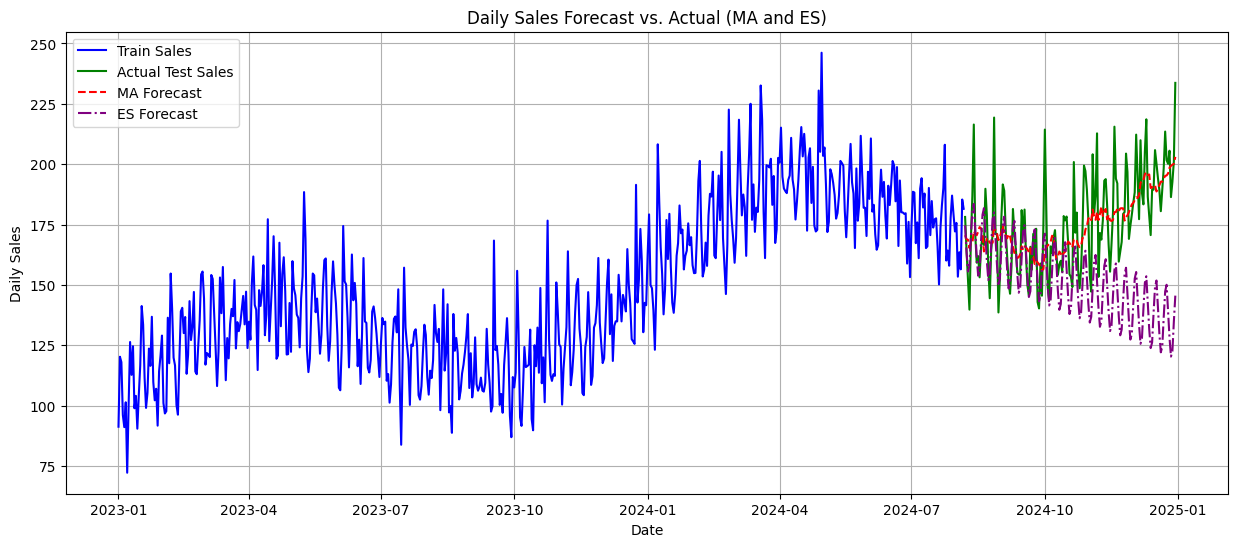

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(train_sales.index, train_sales, label='Train Sales', color='blue')
plt.plot(test_sales.index, test_sales, label='Actual Test Sales', color='green')
plt.plot(ma_predictions.index, ma_predictions, label='MA Forecast', color='red', linestyle='--')
plt.plot(es_predictions.index, es_predictions, label='ES Forecast', color='purple', linestyle='-.')
plt.title('Daily Sales Forecast vs. Actual (MA and ES)')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.grid(True)
plt.show()

### 6. Discussion of Results

Based on the metrics and the visualization, we can compare the performance of the Moving Average and Exponential Smoothing models for `daily_sales`.

*   **Moving Average (MA)**: The MA forecast tends to be quite smooth and lags behind actual changes, especially if there are sudden shifts or strong trends not fully captured by the fixed window. Its performance is limited by its simplicity, often resulting in higher errors for volatile data.

*   **Exponential Smoothing (ES)**: ES models are generally more adaptive to trends and seasonality due to their exponential weighting of past observations. They often provide more accurate forecasts by giving more importance to recent data and explicit handling of seasonal patterns. We would typically expect ES to outperform a simple MA for data with clear trends and seasonality.

**Insights from Comparison:**
(After execution, fill in with specific comparison based on the calculated metrics.)

*   Compare the MAE, MSE, RMSE, and MAPE values between MA and ES. Lower values generally indicate better performance.
*   Observe the forecast plots: Does one model track the actual test sales more closely? Does one handle turns or spikes better?

This same validation process would be applied to `daily_traffic` to evaluate the models' performance on traffic data.

## Model Validation for Daily Traffic

### 1. Data Splitting for Daily Traffic

In [28]:
train_traffic, test_traffic = df['daily_traffic'][0:train_size], df['daily_traffic'][train_size:]

print(f"Training set size (Traffic): {len(train_traffic)}")
print(f"Test set size (Traffic): {len(test_traffic)}")

display(train_traffic.tail())
display(test_traffic.head())

Training set size (Traffic): 584
Test set size (Traffic): 146


,daily_traffic
date,
2024-08-02,1656
2024-08-03,1765
2024-08-04,1689
2024-08-05,2001
2024-08-06,1960


,daily_traffic
date,
2024-08-07,1923
2024-08-08,1771
2024-08-09,1637
2024-08-10,1509
2024-08-11,1828


### 2. Moving Average Model Validation for Daily Traffic

In [29]:
# Recalculate MA on the full data for daily_traffic to get MA for the test period
full_traffic_ma = df['daily_traffic'].rolling(window=7).mean()
ma_predictions_traffic = full_traffic_ma[train_size:]

# Ensure predictions and test_traffic align perfectly
ma_predictions_traffic = ma_predictions_traffic.reindex(test_traffic.index)

print("Moving Average predictions for daily_traffic test set:")
display(ma_predictions_traffic.head())

Moving Average predictions for daily_traffic test set:


,daily_traffic
date,
2024-08-07,1841.571429
2024-08-08,1823.571429
2024-08-09,1820.857143
2024-08-10,1784.285714
2024-08-11,1804.142857


### 3. Exponential Smoothing Model Validation for Daily Traffic

In [30]:
# Fit Exponential Smoothing on training data for daily_traffic
es_model_train_traffic = ExponentialSmoothing(train_traffic, seasonal_periods=7, trend='add', seasonal='add', initialization_method="estimated").fit()

# Forecast for the test period for daily_traffic
es_predictions_traffic = es_model_train_traffic.forecast(len(test_traffic))

print("Exponential Smoothing predictions for daily_traffic test set:")
display(es_predictions_traffic.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Exponential Smoothing predictions for daily_traffic test set:


,0
2024-08-07,1885.534701
2024-08-08,1764.044301
2024-08-09,1679.609732
2024-08-10,1704.888345
2024-08-11,1836.715930


### 4. Evaluation Metrics for Daily Traffic

In [31]:
# Drop NaN values from MA predictions for fair comparison
ma_predictions_traffic_cleaned = ma_predictions_traffic.dropna()
test_traffic_ma_aligned = test_traffic.loc[ma_predictions_traffic_cleaned.index]

# Calculate metrics for Moving Average (Traffic)
mae_ma_traffic = mean_absolute_error(test_traffic_ma_aligned, ma_predictions_traffic_cleaned)
mse_ma_traffic = mean_squared_error(test_traffic_ma_aligned, ma_predictions_traffic_cleaned)
rmse_ma_traffic = np.sqrt(mse_ma_traffic)
mape_ma_traffic = np.mean(np.abs((test_traffic_ma_aligned - ma_predictions_traffic_cleaned) / test_traffic_ma_aligned)) * 100

print("--- Moving Average Model Metrics (Daily Traffic) ---")
print(f"MAE: {mae_ma_traffic:.2f}")
print(f"MSE: {mse_ma_traffic:.2f}")
print(f"RMSE: {rmse_ma_traffic:.2f}")
print(f"MAPE: {mape_ma_traffic:.2f}%")

# Calculate metrics for Exponential Smoothing (Traffic)
mae_es_traffic = mean_absolute_error(test_traffic, es_predictions_traffic)
mse_es_traffic = mean_squared_error(test_traffic, es_predictions_traffic)
rmse_es_traffic = np.sqrt(mse_es_traffic)
mape_es_traffic = np.mean(np.abs((test_traffic - es_predictions_traffic) / test_traffic)) * 100

print("\n--- Exponential Smoothing Model Metrics (Daily Traffic) ---")
print(f"MAE: {mae_es_traffic:.2f}")
print(f"MSE: {mse_es_traffic:.2f}")
print(f"RMSE: {rmse_es_traffic:.2f}")
print(f"MAPE: {mape_es_traffic:.2f}%")

--- Moving Average Model Metrics (Daily Traffic) ---
MAE: 131.64
MSE: 28046.58
RMSE: 167.47
MAPE: 6.95%

--- Exponential Smoothing Model Metrics (Daily Traffic) ---
MAE: 277.81
MSE: 132935.96
RMSE: 364.60
MAPE: 13.80%


### 5. Visualization of Forecasts for Daily Traffic

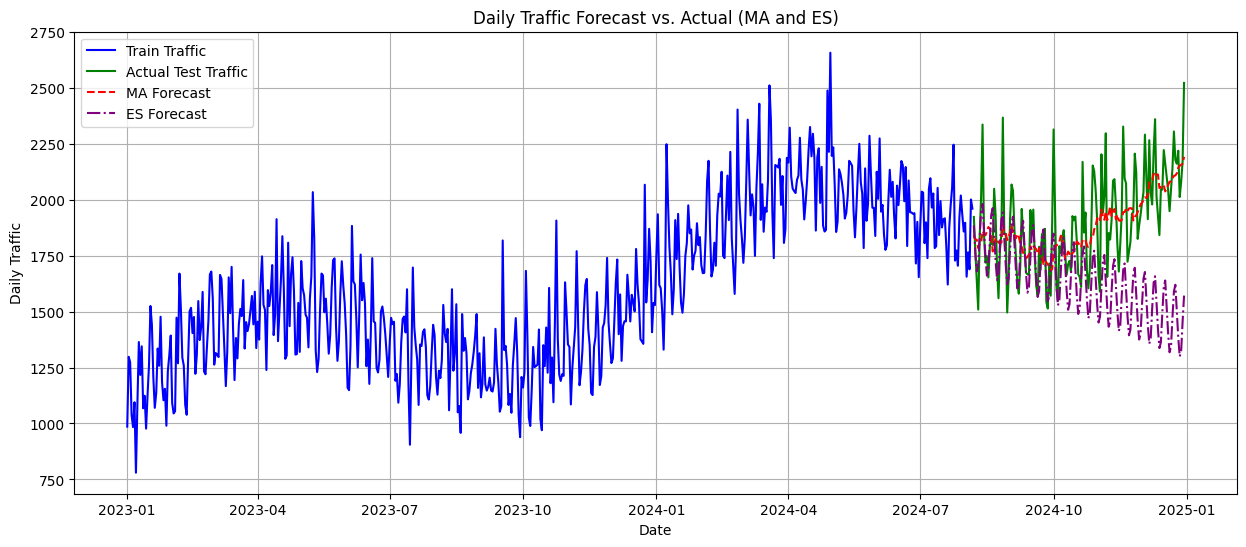

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(train_traffic.index, train_traffic, label='Train Traffic', color='blue')
plt.plot(test_traffic.index, test_traffic, label='Actual Test Traffic', color='green')
plt.plot(ma_predictions_traffic.index, ma_predictions_traffic, label='MA Forecast', color='red', linestyle='--')
plt.plot(es_predictions_traffic.index, es_predictions_traffic, label='ES Forecast', color='purple', linestyle='-.')
plt.title('Daily Traffic Forecast vs. Actual (MA and ES)')
plt.xlabel('Date')
plt.ylabel('Daily Traffic')
plt.legend()
plt.grid(True)
plt.show()

### 6. Discussion of Results for Daily Traffic

Based on the metrics and the visualization, we can compare the performance of the Moving Average and Exponential Smoothing models for `daily_traffic`.

**Insights from Comparison:**
(After execution, fill in with specific comparison based on the calculated metrics.)

*   Compare the MAE, MSE, RMSE, and MAPE values between MA and ES for daily traffic. Lower values generally indicate better performance.
*   Observe the forecast plots: Does one model track the actual test traffic more closely? Does one handle turns or spikes better?